In [1]:
# Single stroke plot, for paper:
import numpy as np
import pickle
from build_database import flux_obj
from scipy import interpolate
from matplotlib import pyplot as plt
from GLD_file_tools import GLD_file_tools
from satellite import Satellite
import datetime
import ephem
from coordinate_structure import coordinate_structure
from coordinate_structure import transform_coords
from longitude_scaling import longitude_scaling
from ionoAbsorp import ionoAbsorp
import os
from mpl_toolkits.basemap import Basemap
from precip_model import precip_model
import itertools
from measurement_model import measurement_model
import random
import matplotlib.tri as mtri
import matplotlib as mpl
%matplotlib inline

# --------------- Latex Plot Beautification --------------------------
#fig_width_pt = 200.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 2.7 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 2*fig_width*golden_mean      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'text.fontsize': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex': False,
          'figure.figsize': fig_size,
          'figure.autolayout': False,
          'figure.subplot.left': 0.15}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

/Users/austin/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Generator objects
GLD_root = '/Users/austin/FUSE2/shared/users/asousa/WIPP/fluxMDP/GLD'

sat_TLE  = ["1 40378U 15003C   15293.75287141  .00010129  00000-0  48835-3 0  9990",
            "2 40378  99.1043 350.5299 0153633 201.4233 158.0516 15.09095095 39471"]

gld = GLD_file_tools(GLD_root,prefix='GLD')

# Satellite object:
sat = Satellite(sat_TLE[0], sat_TLE[1],'Firebird 4')

# Measurement object:
f = measurement_model(database = 'database_dicts.pkl', GLD_root=GLD_root, multiple_bands = True)

p = precip_model(database = 'database_dicts.pkl',multiple_bands=False)

bands = dict()
bands['low'] = [1,2]
bands['mid'] = [3, 4, 5]
bands['high']= [6, 7, 8]


# Column ind
lat_ind = 7;
lon_ind = 8;
mag_ind = 9;



3.68588877169
0.0


/Users/austin/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


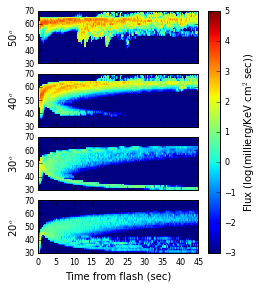

In [5]:
in_lats = [50,40,30,20]
out_lats = np.linspace(30,70,120)
out_times= np.linspace(0,45,200)

out_grid = np.empty([len(out_times),len(out_lats), len(in_lats)])

clims=[-3,5]
for il_ind, il in enumerate(in_lats):
    for ol_ind, ol in enumerate(out_lats):
        out_grid[:,ol_ind,il_ind] = p.get_precip_at(il, ol, out_times)
    
print np.log10(np.max(out_grid))
print np.min(out_grid)

f, ax = plt.subplots(len(in_lats),1)
for il_ind, il in enumerate(in_lats):
    pc = ax[il_ind].pcolor(out_times, out_lats, np.log10(out_grid[:,:,il_ind].T),vmin=clims[0],vmax=clims[1])
    #plt.colorbar(mappable=pc,ax=ax[il_ind])
    ax[il_ind].set_ylabel('%g$^o$'%il)
    ax[il_ind].set_yticks(np.linspace(30,70,5))
    
cax,kw = mpl.colorbar.make_axes([a for a in ax])
cb = plt.colorbar(mappable=pc,cax=cax)
cb.set_label('Flux (log(millierg/KeV cm$^2$ sec))')
ax[-1].set_xlabel('Time from flash (sec)')
plt.setp([a.get_xticklabels() for a in ax[0:-1]], visible=False)
#plt.setp([a.get_yticks() for a in ax], values=[10,20,30,40,50])

#f.tight_layout()
plt.savefig('precip_single.png',dpi=300)

In [4]:
ax[3].set_xlabel('4')